<a href="https://colab.research.google.com/github/Pepe9793/ML_Experiments/blob/main/Experiment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, Reshape
from tensorflow.keras.utils import to_categorical


In [271]:
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [272]:
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values


In [273]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [274]:
X = X.reshape(-1, 4, 2, 1)   # (samples, height, width, channels)


In [275]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [276]:
model = Sequential([
    Conv2D(32, (2,2), activation='relu', input_shape=(4,2,1)),
    MaxPooling2D((1,1)),

    Conv2D(64, (2,2), activation='relu', padding='same'),
    Flatten(),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 3, 1, 32)       │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 3, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 3, 1, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,625 (57.13 KB)

 Trainable params: 14,625 (57.13 KB)

 Non-trainable params: 0 (0.00 B)

In [277]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2
)


Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5681 - loss: 0.6820 - val_accuracy: 0.6098 - val_loss: 0.6386
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7117 - loss: 0.5883 - val_accuracy: 0.7154 - val_loss: 0.5521
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7184 - loss: 0.5340 - val_accuracy: 0.7317 - val_loss: 0.5024
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7732 - loss: 0.4964 - val_accuracy: 0.7642 - val_loss: 0.4887
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7287 - loss: 0.4862 - val_accuracy: 0.7561 - val_loss: 0.4615
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7960 - loss: 0.4651 - val_accuracy: 0.7642 - val_loss: 0.4754
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7589 - loss: 0.4842 - val_accuracy: 0.7398 - val_loss: 0.4689
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8005 - loss: 0.4405 - val_accuracy: 0.7480 - val_loss

In [278]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7125 - loss: 0.6081 
Test Accuracy: 0.7142857313156128


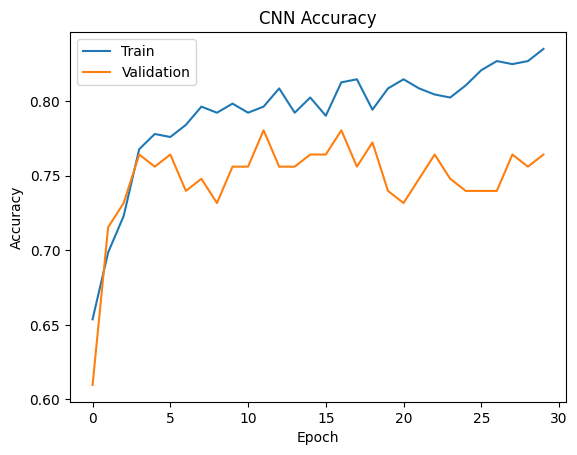

In [279]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()


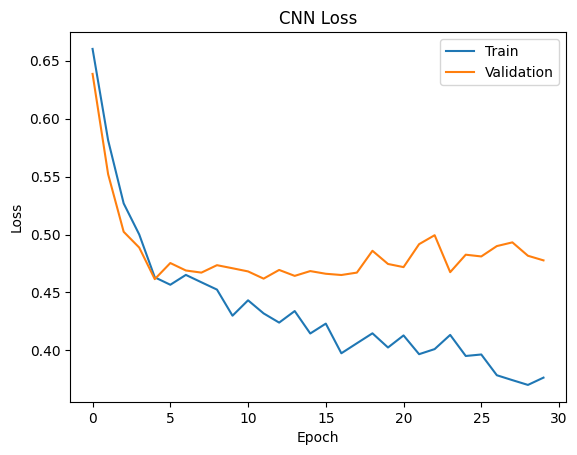

In [280]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("CNN Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()
